In [1]:
# -*- coding:utf-8 -*-
# Modified Author: Inyong Hwang (inyong1020@gmail.com)
# Date: 2019-08-06-Tue
# 파이토치 첫걸음 Chapter 2. 최대 우도 추정과 선형 모델

# 2.3.2 파이토치로 선형 회귀 모델 만들기(직접 만들기)

import torch

w_true = torch.Tensor([1, 2, 3])

x = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)

y = torch.mv(x, w_true) + torch.randn(100) * 0.5

w = torch.randn(3, requires_grad=True)

gamma = 0.1

In [2]:
losses = []

for epoc in range(100):
    w.grad = None
    
    y_pred = torch.mv(x, w)
    
    loss = torch.mean((y - y_pred)**2)
    loss.backward()
    
    w.data = w.data - gamma * w.grad.data
    
    losses.append(loss.item())

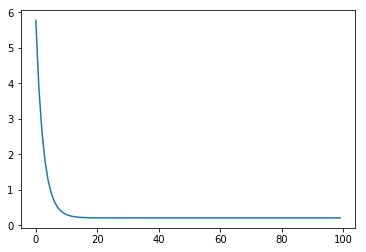

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [4]:
w

tensor([0.9115, 1.9406, 2.9494], requires_grad=True)

In [5]:
# 2.3.3 파이토치로 선형 회귀 모델 만들기(nn, optim 모듈 사용)

from torch import nn, optim

net = nn.Linear(in_features=3, out_features=1, bias=False)

optimizer = optim.SGD(net.parameters(), lr=0.1)

loss_fn = nn.MSELoss()

In [6]:
losses = []

for epoc in range(100):
    optimizer.zero_grad()
    
    y_pred = net(x)
    
    loss = loss_fn(y_pred.view_as(y), y)
    
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.item())

In [7]:
list(net.parameters())

[Parameter containing:
 tensor([[0.9115, 1.9406, 2.9494]], requires_grad=True)]

In [8]:
# 2.4.2 파이토치를 사용한 로지스틱 회귀 분석

import torch
from torch import nn, optim
from sklearn.datasets import load_iris
iris = load_iris()

x = iris.data[:100]
y = iris.target[:100]

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [9]:
net = nn.Linear(4, 1)

loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(net.parameters(), lr=0.25)

In [10]:
losses = []

for epoc in range(100):
    optimizer.zero_grad()
    
    y_pred = net(x)
    
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.item())

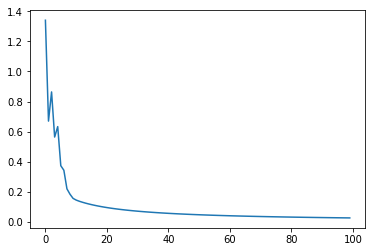

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [12]:
h = net(x)

# prob = nn.functional.sigmoid(h) # old version
prob = torch.sigmoid(h) # new version

y_pred = prob > 0.5

(y.byte() == y_pred.view_as(y)).sum().item()

100

In [13]:
# 2.4.3 다중 분류를 위한 로지스틱 회귀 분석

import torch
from torch import nn, optim
from sklearn.datasets import load_digits
digits = load_digits()

x = digits.data
y = digits.target

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

net = nn.Linear(x.size()[1], 10)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.01)

In [14]:
losses = []

for epoc in range(100):
    optimizer.zero_grad()
    
    y_pred = net(x)
    
    loss = loss_fn(y_pred, y)
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.item())

In [15]:
_, y_pred = torch.max(net(x), 1)
(y_pred == y).sum().item() / len(y)

0.9437952142459655